# **1. Import Libraries**

Pertama kita import library penting: pandas untuk manipulasi data, matplotlib & seaborn untuk visualisasi, serta scikit-learn untuk membuat dan mengevaluasi model linear.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **2. Menghubungkan Google Colab dengan Google Drive**

Dataset diimpor dari google drive MyDrive/GoogleColab_DeepLearning/RedWineQuality/winequality-red.csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/GoogleColab_DeepLearning/RedWineQuality/winequality-red.csv')

# **3. Menampilkan dataset**

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **4. Ekspolari Data**

Dari eksplorasi data dijalankan untuk mengetahui apakah ada data kosong, outlier, dan bagaimana sebaran kualitas.

In [5]:
df.info()
df.describe()
df['quality'].value_counts().sort_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


# **5.   Visualisasi Data**

Visualisasi data digunakan heatmap untuk memilih fitur penting atau untuk memberi catatan di artikel (mis. fitur X berkorelasi positif/negatif)

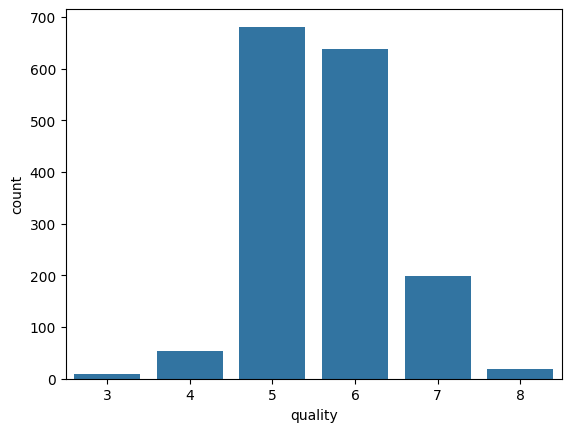

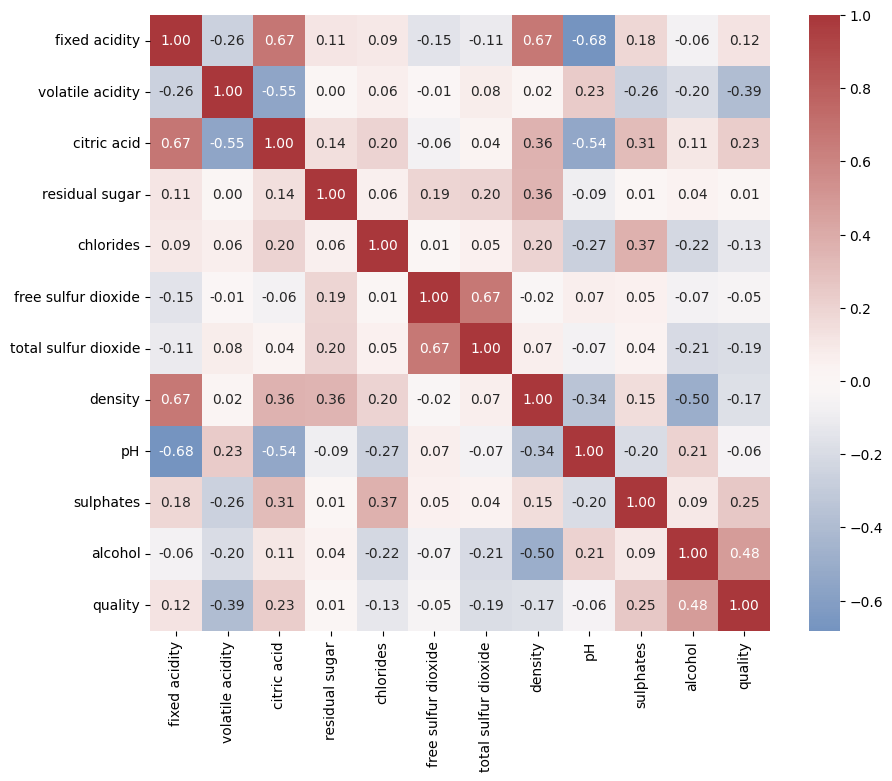

In [6]:
sns.countplot(x="quality", data=df)
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="vlag", center=0)
plt.show()

# **6. Memisahkan Fitur & Target**

Pisahkan input (X) dan target (y). Semua kolom kecuali quality jadi fitur, dan kolom quality menjadi target.

In [7]:
X = df.drop("quality", axis=1)  # fitur
y = df["quality"]               # target

# **7. Standarisasi / Scaling**

Standarisasi/scaling berfungsi untuk membuat semua fitur punya skala yang sama.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # gunakan X_scaled untuk modeling jika pakai scaling

## **8. Split Data Training & Testing**

Memisahkan data training dan data testing, 80% untuk data training, 20% untuk testing.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **9. Buat & Latih Model Linear Regression**

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **10. Prediksi & evaluasi**

*   MSE (mean squared error): rata-rata kuadrat selisih — lebih kecil lebih baik.
*   R²: proporsi varians target yang dapat dijelaskan model (1 = sempurna, 0 = menjelaskan tidak lebih dari rata-rata).


In [11]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.39002514396395427
R-squared (R²): 0.403180341279623


# **11. Lihat koefisien fitur (interpretasi)**

*   Koefisien positif → menaikkan prediksi quality bila fitur naik.
*   Koefisien negatif → menurunkan prediksi quality bila fitur naik.

In [12]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_
}).sort_values(by="coefficient", ascending=False)
coef_df

,feature,coefficient
9,sulphates,0.841172
10,alcohol,0.281890
0,fixed acidity,0.023085
3,residual sugar,0.006564
5,free sulfur dioxide,0.005627
6,total sulfur dioxide,-0.003644
2,citric acid,-0.140821
8,pH,-0.393688
1,volatile acidity,-1.001304
4,chlorides,-1.806503


Dari koefisien, terlihat bahwa alcohol dan sulphates punya pengaruh positif terhadap kualitas wine. Sebaliknya, density, chlorides, dan volatile acidity berpengaruh negatif. Dengan nilai R² sekitar 0.40, model linear regression bisa menangkap sebagian pola, namun belum cukup akurat untuk prediksi kualitas secara penuh.

# **12. Visualisasi hasil prediksi & residual**



*   Visualisasi antara scatter actual vs predicted: titik dekat garis diagonal artinya prediksi bagus.
*   Residuals histogram untuk mencek distribusi error; jika simetris sekitar 0 → bagus. Pola di residuals (mis. non-random) menandakan model linier kurang cocok.



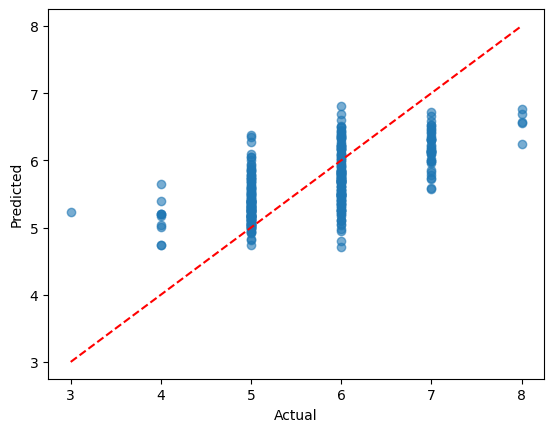

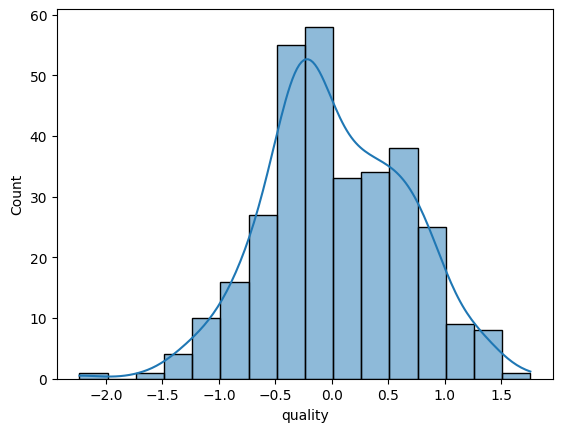

In [13]:
# Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Residuals histogram
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.show()